Read .nc files

In [3]:
import xarray as xr

# Open the NetCDF file
file_path = r"D:\CAMS\CAMS_global_reanalysis_EAC4\chem_singlvl\final_2003_2024\CAMS_global_reanalysis_EAC4_chem_singlvl_200301.nc"
ds = xr.open_dataset(file_path)

# Display the dataset's structure and metadata
print("Dataset Overview:\n")
print(ds)

# List all variables in the dataset
print("\nAvailable Variables:")
for var in ds.variables:
    print(f"- {var}: {ds[var].dims}, {ds[var].shape}")


Dataset Overview:

<xarray.Dataset> Size: 17MB
Dimensions:    (latitude: 43, time: 248, longitude: 65)
Coordinates:
  * latitude   (latitude) float32 172B 66.0 65.25 64.5 63.75 ... 36.0 35.25 34.5
  * time       (time) datetime64[ns] 2kB 2003-01-01 ... 2003-01-31T21:00:00
  * longitude  (longitude) float32 260B -12.0 -11.25 -10.5 ... 34.5 35.25 36.0
Data variables:
    pm10       (time, latitude, longitude) float64 6MB ...
    pm1        (time, latitude, longitude) float64 6MB ...
    pm2p5      (time, latitude, longitude) float64 6MB ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-25 09:27:49 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

Available Variables:
- latitude: ('latitude',), (43,)
- time: ('time',), (248,)
- pm10: ('time', 'latitude', 'longitude'), (248, 43, 65)
- pm1: ('time', 'latitude', 'longitude'), (248, 43, 65)
- pm2p5: ('time', 'latitude', 'longitude'), (248, 43, 65)
- longitude: ('longitude',), (65,)


Read .mat files

In [ ]:
from scipy.io import loadmat

data = loadmat(r"D:\CAMS\MODIS_FRP\MODIS_2001.mat", struct_as_record=False, squeeze_me=True)

dados = data["dados"]  # Extract variable

print("Type of 'dados':", type(dados))

if hasattr(dados, "_fieldnames"):  # Check if it's a struct
    print("Struct fields:", dados._fieldnames)
    for field in dados._fieldnames:
        print(f"Field '{field}':", getattr(dados, field))

View on map

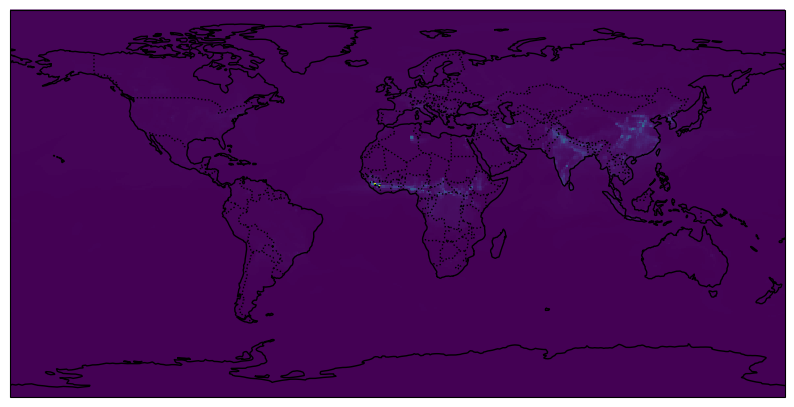

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load your NetCDF file (change the path accordingly)
file_path = r"D:\CAMS\CAMS_global_reanalysis_EAC4\chem_multlvl\CAMS_global_reanalysis_EAC4_chem_multlvl_200301.nc"
ds = xr.open_dataset(file_path)

# Extract the data you want to plot (for example, pm10)
pm10_data = ds['co'].isel(time=0)  # Select the first time step (change if needed)

# Extract longitude and latitude values
lon = ds['longitude'].values
lat = ds['latitude'].values

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up the map: add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the data (you can adjust the colormap and other settings)
c = ax.pcolormesh(lon, lat, pm10_data, cmap='viridis', shading='auto', transform=ccrs.PlateCarree())

# Show the plot
plt.show()

# Close the dataset after processing
ds.close()


In [4]:
import xarray as xr
import pandas as pd

# Open the NetCDF file
nc_file = r"D:\CAMS\CAMS_global_reanalysis_EAC4\chem_singlvl\final_2003_2024_conversion\CAMS_global_reanalysis_EAC4_chem_singlvl_200301.nc"
ds = xr.open_dataset(nc_file)

# Convert all variables to a DataFrame
df = ds.to_dataframe().reset_index()

# Display the first few rows
print(df.head())


   latitude       time  longitude      pm10       pm1     pm2p5
0      66.0 2003-01-01     -12.00  6.242203  0.140401  3.158693
1      66.0 2003-01-01     -11.25  5.738800  0.140401  2.927569
2      66.0 2003-01-01     -10.50  5.436758  0.140401  2.773486
3      66.0 2003-01-01      -9.75  5.034035  0.140401  2.542362
4      66.0 2003-01-01      -9.00  4.731993  0.140401  2.388280
